In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2566,ham,You in your room? I need a few,NaN,NaN,NaN
2891,ham,Babe? You said 2 hours and it's been almost 4 ...,NaN,NaN,NaN
2227,ham,Oh k.k..where did you take test?,NaN,NaN,NaN
4781,ham,"Call me, i am senthil from hsbc.",NaN,NaN,NaN
2742,ham,No * am working on the ringing u thing but hav...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

Steps to be followed:
## 1.Data Cleaniing 
## 2.EDA
## 3.Text Preprocessing
## 4. Model Building
## 5. Evaluation
## 6. Improvement
## 7. Deployemnet



## . Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3',"Unnamed: 4"],inplace=True)


In [7]:
df.sample(5)

,v1,v2
4249,ham,How much for an eighth?
4691,ham,"By march ending, i should be ready. But will c..."
4755,ham,Don't make life too stressfull.. Always find t...
1426,ham,Ok...
4782,ham,Especially since i talk about boston all up in...


In [8]:
#renaming the cols 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,target,text
150,ham,The wine is flowing and i'm i have nevering..
1894,spam,"FreeMsg Hey U, i just got 1 of these video/pic..."
2202,ham,(And my man carlos is definitely coming by mu ...
810,ham,S:)s.nervous &lt;#&gt; :)
5269,spam,"If you don't, your prize will go to another cu..."


In [10]:
# encoding spam and ham 
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values check
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values 
print(df.duplicated().sum())

403


In [15]:
#removing duplicated values 
df = df.drop_duplicates(keep='first')

In [16]:
print(df.duplicated().sum())

0


# 2. EDA 

In [17]:
# counting ham and spam 
df['target'].value_counts()       #0 - ham / 1 - spam

target
0    4516
1     653
Name: count, dtype: int64

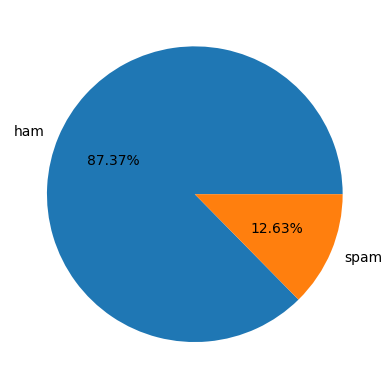

In [18]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%')
plt.show()


In [19]:
import nltk #natural language tool-kit

In [20]:
nltk.download('punkt') ## doenloading dependancies for nltk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['text'].apply(len)  # giving the len of text/how many char 

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [22]:
df['num_char'] = df['text'].apply(len) # creatd a new col --> num_char

In [23]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# no of words
df['text'].apply(lambda x :len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [25]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SAHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
df['num_words'] = df['text'].apply(lambda x :len(nltk.word_tokenize(x))) 
# created a nw col  ---> new_word on basis of no, words

In [27]:
df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))  # no of sentences

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [28]:
df["num_sentences"] = df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [29]:
df.head(5)

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_char','num_sentences','num_words']].describe()

,num_char,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [31]:
# analyzing HAM
df[df['target']==0][['num_char','num_sentences','num_words']].describe()

,num_char,num_sentences,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [32]:
# analyzing SPAM
df[df['target']==1][['num_char','num_sentences','num_words']].describe()

,num_char,num_sentences,num_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

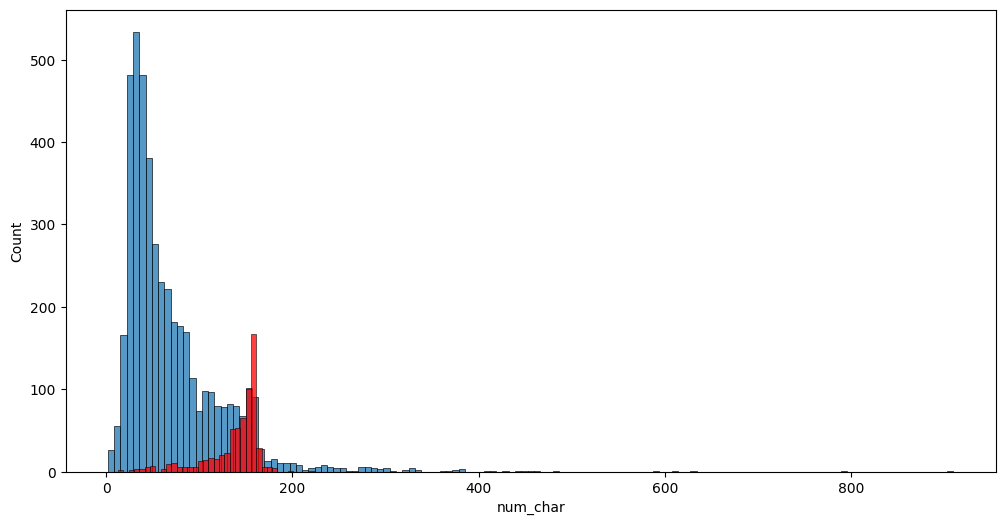

In [34]:
# no of char for ham messages and spam messages
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

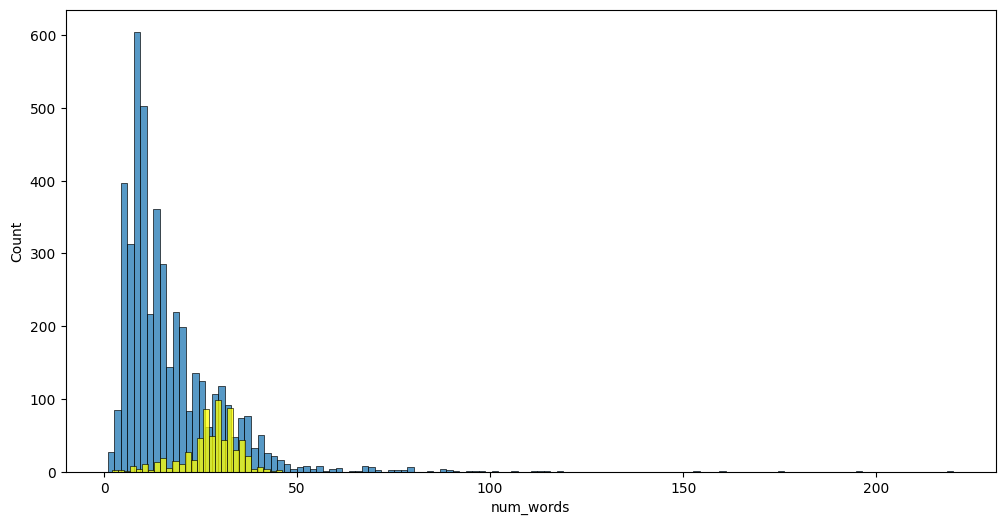

In [35]:
# no of words for ham messages and spam messages
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='yellow')

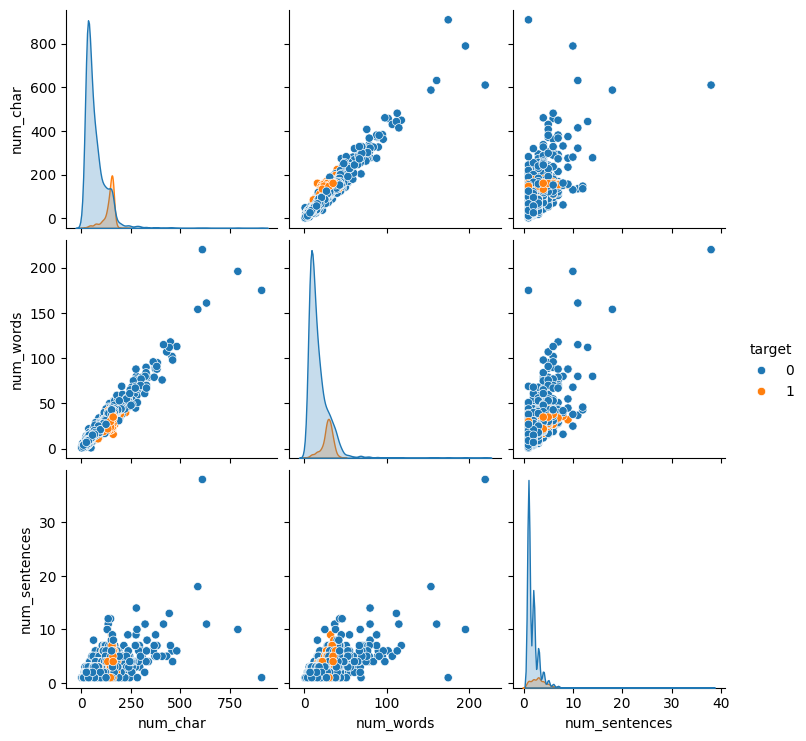

In [36]:
# visualizing the relaations between char/words/sen 
sns.pairplot(df,hue= 'target')

In [37]:
# correlation -- (only for numeric)
df.corr(numeric_only=True)

,target,num_char,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

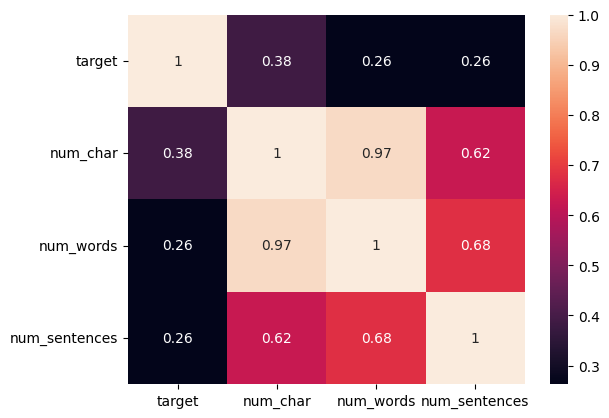

In [38]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# data Preprocessing // Text preprocessing

## lower case/ Tokenization/Removing Special Characters/Removing stop word and punctuation / stemming ##

In [39]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
# from showing stopwords
from nltk.corpus import stopwords
#stopwords.words('english')

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()   # it bring the word to root format : loving/loved ---> love 

In [43]:
def transform_text(text):
    text = text.lower()  #lowercase
    text = nltk.word_tokenize(text)   #tokenization
    y = [] 
    for i in text:  #removing special char
        if i.isalnum(): #alpha numeric  
            y.append(i)
    # text = y   --- we never copy list like this , its a mutable datatype 
    text = y[:] # WE DO CLONING 
    y.clear()

    for i in text:  ## Removing stop word and punctuation / stemming ##
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:] # WE DO CLONING 
    y.clear()

    for i in text: 
        y.append(ps.stem(i))
    
    return " ".join(y)   # returning as a string

In [44]:
df["text"].apply(transform_text)    # text processing done 

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [45]:
df['transformed_text'] = df["text"].apply(transform_text) 

In [46]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# wordcloud : show important words as big

In [47]:
!pip install wordcloud

In [48]:
from wordcloud import WordCloud
wc =  WordCloud(width = 500 , height= 500 ,min_font_size= 10,background_color="white")

In [49]:
#                  for spam               \extracting transformed_text)
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
#                                                             ((^making string and concatenating it with " ")  

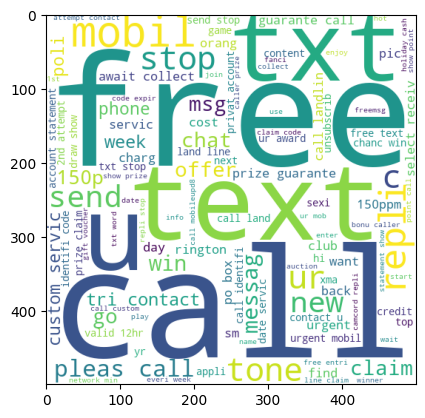

In [50]:
plt.imshow(spam_wc)

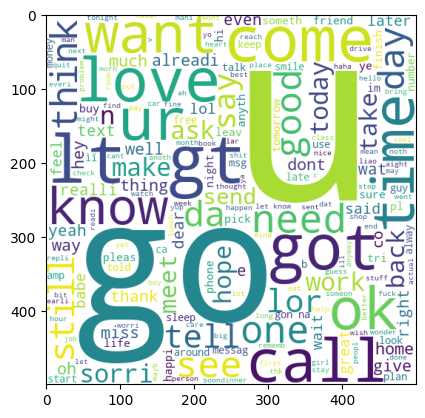

In [51]:
# for ham 
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [52]:
# Now we will find top 50-30 word which are used in both ham and spam 
spam_corpus=[]
for msg in df[df['target']==1]["transformed_text"].tolist(): 
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

9939

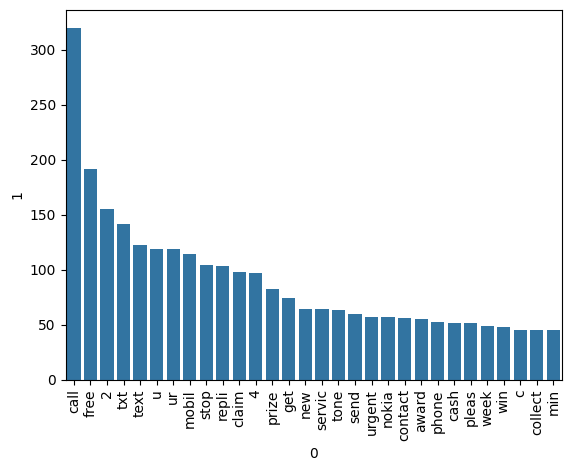

In [54]:
## this eda soll purpose is to define interpretabilty of the model that we are defining
from collections import Counter   # will make a dictionary
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
#ham
ham_corpus=[]
for msg in df[df['target']==0]["transformed_text"].tolist(): 
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)

35404

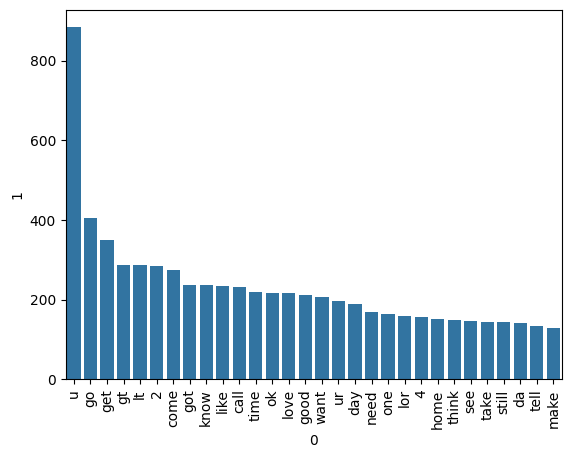

In [57]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y= pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING

In [58]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

## Vectorizing - BAG OF WORDS

In [59]:
# X --- >  text/words
X = cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [60]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
# Y ------>  spam/ham
Y = df['target'].values

In [62]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
#splitting data 
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# for metric -->%precision,accuracy
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
# TESTING GAUSSISIAN
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(f"ACCURACY: {accuracy_score(Y_test,Y_pred1)}")
print(f"Confusion Matrix :")
print(confusion_matrix(Y_test,Y_pred1))
print(f"Precision:{precision_score(Y_test,Y_pred1)}")

ACCURACY: 0.8800773694390716
Confusion Matrix :
[[792 104]
 [ 20 118]]
Precision:0.5315315315315315


In [68]:
#TESTING MULTINOMIAL
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(f"ACCURACY: {accuracy_score(Y_test,Y_pred2)}")
print(f"Confusion Matrix :")
print(confusion_matrix(Y_test,Y_pred2))
print(f"Precision:{precision_score(Y_test,Y_pred2)}")

ACCURACY: 0.9642166344294004
Confusion Matrix :
[[871  25]
 [ 12 126]]
Precision:0.8344370860927153


In [69]:
# TESTING BernoullI
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(f"ACCURACY: {accuracy_score(Y_test,Y_pred3)}")
print(f"Confusion Matrix :")
print(confusion_matrix(Y_test,Y_pred3))
print(f"Precision:{precision_score(Y_test,Y_pred3)}")

ACCURACY: 0.9700193423597679
Confusion Matrix :
[[893   3]
 [ 28 110]]
Precision:0.9734513274336283


## tFdIIFVECTOR

In [70]:
X =tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [71]:
# scaling model for improvement ---NO IMPROVEMENT PRECISION WENT DOWN 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)


In [72]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
Y = df['target'].values

In [74]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# for metric -->%precision,accuracy
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [77]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [78]:
# TESTING GAUSSISIAN
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(f"ACCURACY: {accuracy_score(Y_test,Y_pred1)}")
print(f"Confusion Matrix :")
print(confusion_matrix(Y_test,Y_pred1))
print(f"Precision:{precision_score(Y_test,Y_pred1)}")

ACCURACY: 0.8771760154738878
Confusion Matrix :
[[786 110]
 [ 17 121]]
Precision:0.5238095238095238


In [79]:
#TESTING MULTINOMIAL
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(f"ACCURACY: {accuracy_score(Y_test,Y_pred2)}")
print(f"Confusion Matrix :")
print(confusion_matrix(Y_test,Y_pred2))
print(f"Precision:{precision_score(Y_test,Y_pred2)}")

ACCURACY: 0.9787234042553191
Confusion Matrix :
[[889   7]
 [ 15 123]]
Precision:0.9461538461538461


In [80]:
# TESTING BernoullIabsmnb.fit(X_train,Y_train)
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(f"ACCURACY: {accuracy_score(Y_test,Y_pred3)}")
print(f"Confusion Matrix :")
print(confusion_matrix(Y_test,Y_pred3))
print(f"Precision:{precision_score(Y_test,Y_pred3)}")

ACCURACY: 0.9835589941972921
Confusion Matrix :
[[895   1]
 [ 16 122]]
Precision:0.991869918699187


### precison is reliable score going with mnb mMultinomialNB


# thus tfidf(methodd) -----> MultinomialNB

# CONCLUSION
cAN APPLY MULTIPLE CLASSIFIERS - ALGORITHMS BUT IT WILL STILL NOT PASS THE PRECISION OF MULTINOMIAL-NB
CAN ALSO COMBINE ALGO THROUGH STACKING OR VOTING CLASSIFIERS STILL MNB IS BEST WITH PRECISION